In [19]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import random
plt.rcParams.update({'font.size': 14})

# –ó–∞–¥–∞—á–∞ ‚Ññ1

#### –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫—É—é –º–æ–¥–µ–ª—å —É—Å—Ç–æ–π—á–∏–≤–æ–π –∏ –Ω–µ—É—Å—Ç–æ—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –≤–∏–¥–∞:
$$
\dot x = -x
$$
$$
\dot x = x
$$

#### –ó–∞–¥–∞–Ω–∏–µ:
1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ç–æ—á–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ
2. –ß–∏—Å–ª–µ–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–º –≠–π–ª–µ—Ä–∞ –∏ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ 4-–≥–æ –ø–æ—Ä—è–¥–∫–∞
3. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–æ–∫ –º–µ—Ç–æ–¥–æ–≤ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ç–æ—á–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º

#### –†–µ—à–µ–Ω–∏–µ:

–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ:

$x = e^{-x} \cdot x_0$ –¥–ª—è —Å–∏—Å—Ç–µ–º—ã $\dot x = -x$

$x = e^{x} \cdot x_0$ –¥–ª—è —Å–∏—Å—Ç–µ–º—ã $\dot x = x$

In [2]:
def expected_stable(x, x0):
    return np.exp(-x)*x0

def expected_unstable(x, x0):
    return np.exp(x)*x0

–ß–∏—Å–ª–µ–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –ö–æ—à–∏ $y' = f(x, y), y(a) = y_0$ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ $[a, b]$ —Å–æ—Å—Ç–æ–∏—Ç –≤ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ —Ç–∞–±–ª–∏—Ü—ã –ø—Ä–∏–±–ª–∏–∂—ë–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π $y_0, y_1, ..., y_i, ..., y_N$ —Ä–µ—à–µ–Ω–∏—è $y = y(x), y(x_i) ‚âà y_i, ...$

–ü—Ä–æ—Å—Ç–µ–π—à–∏–π –æ–¥–Ω–æ—à–∞–≥–æ–≤—ã–π –º–µ—Ç–æ–¥ —á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ö–æ—à–∏ ‚Äî *–º–µ—Ç–æ–¥ –≠–π–ª–µ—Ä–∞*. –í –º–µ—Ç–æ–¥–µ –≠–π–ª–µ—Ä–∞ –≤–µ–ª–∏—á–∏–Ω—ã $y_i$ –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ: $y_{i+1} = y_i + h\cdot f(x_i, y_i)$

In [3]:
def euler(f, y0, h, n):
    y = np.empty((np.size(y0), n))  
    y[:,0] = y0
    for i in range(1, n):
        y[:,i] = y[:,i - 1] + h * f(i*h, y[:,i-1])
    return y

–ú–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç—ã –∏—Å–ø–æ–ª—å–∑—É—é—Ç –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —á–∞—Å—Ç–æ, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–æ–º –æ–±—ä–µ–º–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π –æ–Ω –æ–±–ª–∞–¥–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å—é –º–µ—Ç–æ–¥–∞ $Œü(h^4)$.

$$\frac{dy}{dx} = f(x, y(x)), y(a) = y_0$$

–ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ 4-–≥–æ –ø–æ—Ä—è–¥–∫–∞ –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–µ–π —Å–∏—Å—Ç–µ–º–æ–π –ø—è—Ç–∏ —Ä–∞–≤–µ–Ω—Å—Ç–≤:

$$y(x_{k+1}) = y(x_k) + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

–ì–¥–µ

$$ 
\begin{cases}
k_1 = f(x_k, y_k),\\
k_2 = f(x_k + \frac{h}{2}, y_k + \frac{hk_1}{2}),\\
k_3 = f(x_k + \frac{h}{2}, y_k + \frac{hk_2}{2}),\\
k_4 = f(x_k + h, y_k + hk_3), \\
\end{cases}
$$

In [4]:
def runge(f, y0, h, n):
    y = np.empty((np.size(y0), n))  
    y[:,0] = y0
    
    for i in range(1, n):
        k1 = f(i*h, y[:,i - 1])
        k2 = f(i*h + h/2, y[:,i - 1] + h/2*k1)
        k3 = f(i*h + h/2, y[:,i - 1] + h/2*k2)
        k4 = f(i*h + h, y[:,i - 1] + h*k3)
    
        y[:,i] = y[:,i - 1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return y

–ü—É—Å—Ç—å $x_0 = 10$ - –Ω–∞—á–∞–ª—å–Ω–æ–µ —É—Å–ª–æ–≤–∏–µ  $\Delta t = 0.3$ - —à–∞–≥ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ $n = 20$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —à–∞–≥–æ–≤.

In [5]:
x0, dt, n = 10.0, 0.3, 20
t = np.arange(0, dt*n, dt)

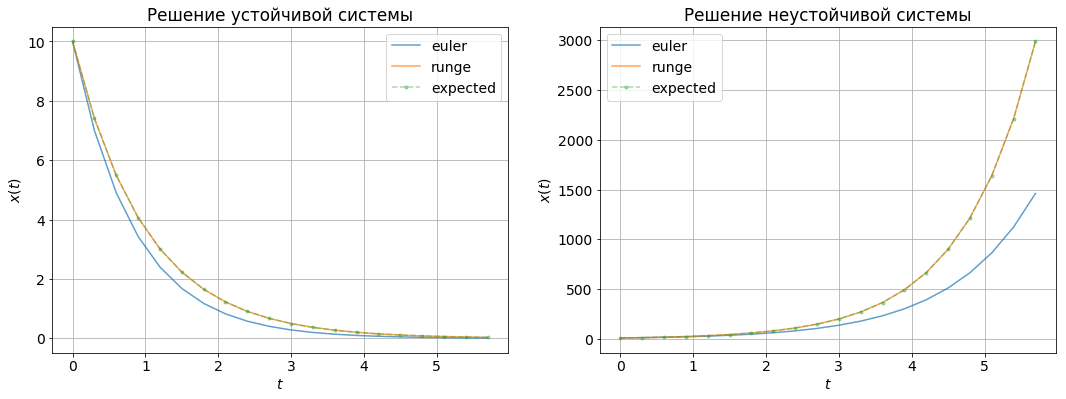

In [6]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

stable = (ax1, lambda t, x: -x, expected_stable, "–†–µ—à–µ–Ω–∏–µ —É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã")
unstable = (ax2, lambda t, x: x, expected_unstable, "–†–µ—à–µ–Ω–∏–µ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã")

for ax, f, expected, title in (stable, unstable):
    x_euler = euler(f, x0, dt, n)[0]
    x_runge = runge(f, x0, dt, n)[0]
    x_expected = expected(t, x0)

    ax.set_title(title)
    ax.plot(t, x_euler, alpha = 0.7, label='euler')
    ax.plot(t, x_runge, alpha = 0.7, label='runge')
    ax.plot(t, x_expected, '.--', alpha = 0.4, label='expected')

    ax.legend()
    ax.grid(True)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x(t)$')

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —á–∏—Å–ª–µ–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —Ç–æ—á–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º, –≤ —Ä–µ—à–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–º –≠–π–ª–µ—Ä–∞ –æ—á–µ–Ω—å –ø—Ä–∏–±–ª–µ–∂–µ–Ω–Ω–æ.

–ü–æ–¥ –æ—à–∏–±–∫–æ–π –º–µ—Ç–æ–¥–æ–≤ –±—É–¥–µ–º –ø–æ–Ω–∏–º–∞—Ç—å —Ä–∞–∑–Ω–∏—Ü—É $\Delta x = |x(t) - x^*(t)|$, –≥–¥–µ $x(t)$ —Ç–æ—á–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ, –∞ $x^*(t)$ - –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —á–∏—Å–ª–µ–Ω–Ω–æ–µ. –¢–æ–≥–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –æ—à–∏–±–æ–∫ –±—É–¥–µ—Ç –≤—ã–≥–ª—è–¥–µ—Ç—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

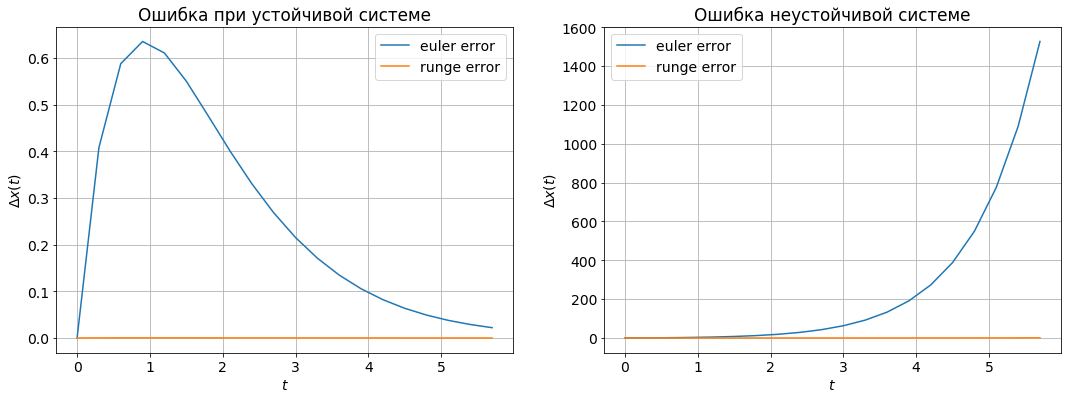

In [7]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

stable = (ax1, lambda t, x: -x, expected_stable, "–û—à–∏–±–∫–∞ –ø—Ä–∏ —É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º–µ")
unstable = (ax2, lambda t, x: x, expected_unstable, "–û—à–∏–±–∫–∞ –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º–µ")

for ax, f, expected, title in (stable, unstable):
    x_euler = euler(f, x0, dt, n)[0]
    x_runge = runge(f, x0, dt, n)[0]
    x_expected = expected(t, x0)
    
    euler_error = np.abs(x_euler - x_expected)
    runge_error = np.abs(x_runge - x_expected)

    ax.set_title(title)
    ax.plot(t, euler_error, label='euler error')
    ax.plot(t, runge_error, label='runge error')

    ax.legend()
    ax.grid(True)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\Delta x(t)$')

–í —Å–ª—É—á–∞–µ —É—Å—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –≠–π–ª–µ—Ä –Ω–∞–∫–∞–ø–ª–∏–≤–∞–µ—Ç –æ—à–∏–±–∫—É, –Ω–æ –≤ —Å–∏–ª—É —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏, –æ–Ω —Å—Ö–æ–¥–∏—Ç—Å—è –≤—Å–µ —Ä–∞–≤–Ω–æ –∫ —Ç–æ—á–Ω–æ–º—É —Ä–µ—à–µ–Ω–∏—é. –í —Å–ª—É—á–∞–µ –Ω–µ—É—Ç–æ–π—á–∏–≤–æ–π —Å–∏—Å—Ç–µ–º—ã –º–µ—Ç–æ–¥ –Ω–∞–∫–∞–ø–ª–∏–≤–∞–µ—Ç –æ—à–∏–±–∫—É –∏ —É—Ö–æ–¥–∏—Ç —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –æ—Ç —Ç–æ—á–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è —Å —Ä–æ—Å—Ç–æ–º $t$. –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ –≤ –æ–±–æ–∏—Ö —Å–∏—Ç—É–∞—Ü–∏—è—Ö –±–ª–∏–∑–æ–∫ –∫ –∏—Å—Ç–∏–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É.

# –ó–∞–¥–∞—á–∞ ‚Ññ2

#### –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫—É—é –º–æ–¥–µ–ª—å –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–∞—è—Ç–Ω–∏–∫–∞ –≤–∏–¥–∞:
$$
\ddot x + x = 0
$$

#### –ó–∞–¥–∞–Ω–∏–µ:
1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ç–æ—á–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ
2. –ß–∏—Å–ª–µ–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–º –≠–π–ª–µ—Ä–∞ –∏ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ 4-–≥–æ –ø–æ—Ä—è–¥–∫–∞
3. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–æ–∫ –º–µ—Ç–æ–¥–æ–≤ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ç–æ—á–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º

#### –†–µ—à–µ–Ω–∏–µ:

–£—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç–∫–≤–∏–≤–∞–ª–µ—Ç–Ω–∞ —Å–∏—Å—Ç–µ–º–µ:

$$
\begin{cases}
\dot x_1 = x_2 \\
\dot x_2 = -x_1
\end{cases}
$$

–ì–¥–µ $x_1 = x$ –∏ $x_2 = \dot x$. –ü—Ä–∏ $x_1(0)=0$ –∏ $x_2(0)=1$ —Å–∏—Å—Ç–µ–º–∞ –∏–º–µ–µ—Ç —Ä–µ—à–µ–Ω–∏–µ:

$$
\begin{cases}
x_1(t) = sin(t) \\
x_2(t) = cos(t)
\end{cases}
$$

–†–µ—à–∏–º –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –ø—Ä–∏ $x_1 = x$

In [8]:
dt, n = 0.2, 100
x0 = [0, 1]
t = np.arange(0, dt*n, dt)

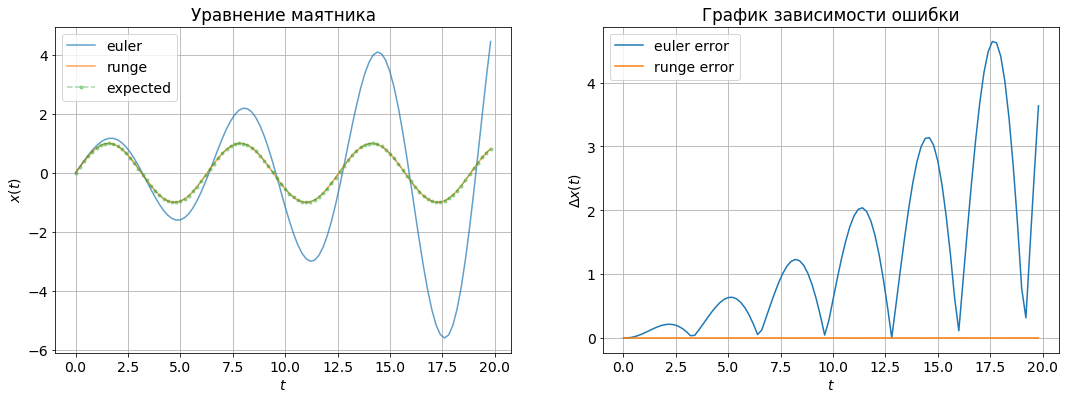

In [9]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

f = lambda t, x: np.array((x[1], -x[0]))
expected = lambda x: np.array((np.sin(x), np.cos(x)))

x_euler = euler(f, x0, dt, n)[0]
x_runge = runge(f, x0, dt, n)[0]
x_expected = expected(t)[0]

ax1.set_title("–£—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–∞—è—Ç–Ω–∏–∫–∞")
ax1.plot(t, x_euler, alpha = 0.7, label='euler')
ax1.plot(t, x_runge, alpha = 0.7, label='runge')
ax1.plot(t, x_expected, '.--', alpha = 0.4, label='expected')

ax1.legend()
ax1.grid(True)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x(t)$')

ax2.set_title(r"–ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—à–∏–±–∫–∏")

euler_error = np.abs(x_euler - x_expected)
runge_error = np.abs(x_runge - x_expected)

ax2.plot(t, euler_error, label='euler error')
ax2.plot(t, runge_error, label='runge error')

ax2.legend()
ax2.grid(True)
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$\Delta x(t)$')
pass

–ú–µ—Ç–æ–¥ –≠–π–ª–µ—Ä–∞ –ø–µ—Ä–µ–æ–¥–∏—á–Ω–æ —Ä–∞—Å—Ö–æ–¥–∏—Ç—Å—è –æ—Ç —Ç–æ—á–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è. –ú–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ —Ä–µ—à–∞–µ—Ç —Å–∏—Å—Ç–µ–º—É –≥–æ—Ä–∞–∑–¥–æ —Ç–æ—á–Ω–µ–µ

# –ó–∞–¥–∞—á–∞ ‚Ññ3

#### –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–∏—Å—Ç–µ–º—É –†—ë—Å—Å–ª–µ—Ä–∞:
$$
\begin{cases}
\dot x = - y - z \\
\dot y = x + ay \\
\dot z = b + (x - r)z \\
\end{cases}
$$

#### –ó–∞–¥–∞–Ω–∏–µ:

1. –ß–∏—Å–ª–µ–Ω–Ω–æ–µ —Ä–µ—à–∏—Ç—å —Å–∏—Å—Ç–µ–º—É –º–µ—Ç–æ–¥–æ–º –≠–π–ª–µ—Ä–∞ –∏ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞ 4-–≥–æ –ø–æ—Ä—è–¥–∫–∞ –ø—Ä–∏ $a=b=0.2$ –∏ $r = 5.7$
2. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–æ–∫ –º–µ—Ç–æ–¥–æ–≤ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ç–æ—á–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º
3. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ $y(x)$ –∏ $z(x)$


#### –†–µ—à–µ–Ω–∏–µ:

In [10]:
dt, n = 0.01, 10000
x0 = (0, 0, 0.035)
t = np.arange(0, dt*n, dt)
a = b = 0.2
r = 5.7

def rossler(t, xm):
    x, y, z = xm
    dx = -y - z
    dy = x + a*y
    dz = b + (x - r)*z
    return np.array((dx, dy, dz))

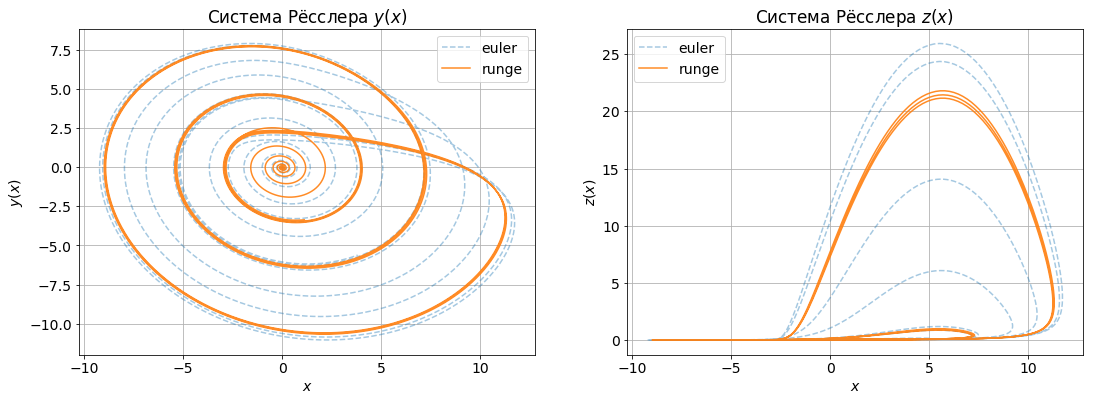

In [11]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x_euler, y_euler, z_euler = euler(rossler, x0, dt, n)
x_runge, y_runge, z_runge = runge(rossler, x0, dt, n)

ax1.plot(x_euler, y_euler, '--', alpha = 0.4, label='euler')
ax1.plot(x_runge, y_runge, alpha = 0.9, label='runge')
ax2.plot(x_euler, z_euler, '--', alpha = 0.4, label='euler')
ax2.plot(x_runge, z_runge, alpha = 0.9, label='runge')

ax1.set_title(r'–°–∏—Å—Ç–µ–º–∞ –†—ë—Å—Å–ª–µ—Ä–∞ $y(x)$');
ax2.set_title(r'–°–∏—Å—Ç–µ–º–∞ –†—ë—Å—Å–ª–µ—Ä–∞ $z(x)$')
ax1.legend();              ax2.legend()
ax1.grid(True);            ax2.grid(True)
ax1.set_xlabel(r'$x$');    ax2.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y(x)$'); ax2.set_ylabel(r'$z(x)$')
pass

–£ –Ω–∞—Å –Ω–µ—Ç —Ç–æ—á–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è, –ø–æ—ç—Ç–æ–º—É –±—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –º–µ—Ç–æ—Ç–æ–¥–æ–≤ —Å –º–µ–Ω—å—à–∏–º —à–∞–≥–æ–º.

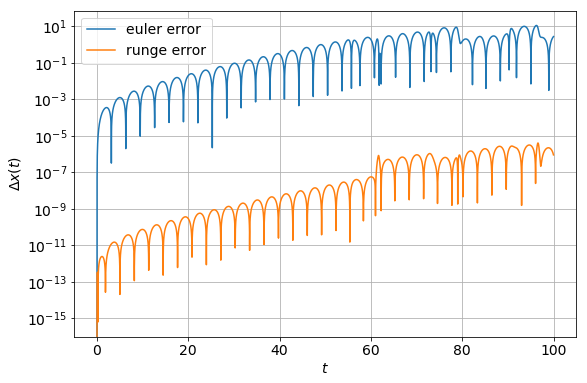

In [12]:
fig = plt.figure(figsize=(9,6))
ax2 = fig.add_subplot(111)

alpha = 10

x_euler, y_euler, z_euler = euler(rossler, x0, dt, n)
x_euler_2, y_euler_2, z_euler_2= euler(rossler, x0, dt/alpha, n*alpha)

x_euler_2 = x_euler_2[::alpha]; y_euler_2 = y_euler_2[::alpha]; z_euler_2 = z_euler_2[::alpha]

x_runge, y_runge, z_runge = runge(rossler, x0, dt, n)
x_runge_2, y_runge_2, z_runge_2 = runge(rossler, x0, dt/alpha, n*alpha)

x_runge_2 = x_runge_2[::alpha]; y_runge_2 = y_runge_2[::alpha]; z_runge_2 = z_runge_2[::alpha]

euler_error = np.abs(x_euler_2 - x_euler)
runge_error = np.abs(x_runge_2 - x_runge)

ax2.plot(t, euler_error, label='euler error')
ax2.plot(t, runge_error, label='runge error')

ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$\Delta x(t)$')
pass

–û—à–∏–±–∫–∏ —Ä–∞—Å—Ç—É—Ç, —ç—Ç–æ –º–æ–∂–µ—Ç –ø—Ä–æ–∏–∑–æ–π—Ç–∏ —Ç–æ–≥–æ, —á—Ç–æ –º–µ—Ç–æ–¥ —Å –º–µ–Ω—å—à–∏–º —à–∞–≥–æ–º –∏–∑-–∑–∞ —Ö–∞–æ—Ç–∏—á–Ω–æ–≥–æ –¥–≤–∏–∂–µ–Ω–∏—è, –ø–µ—Ä–µ—à–µ–ª –Ω–∞ –¥—Ä—É–≥—É—é —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—é, –∏ —Ä–∞–∑–æ—à–µ–ª—Å—è —Å –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–º –º–µ—Ç–æ–¥–æ–º.

# –ó–∞–¥–∞—á–∞ ‚Ññ4

#### –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞:
–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∑–∞–¥–∞—á—É –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∏—Å—Å–æ—Ü–∏–∞—Ü–∏–∏ (—Ä–∞—Å–ø–∞–¥–∞) –≤–µ—â–µ—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä–∞—è –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è —É—Ä–∞–≤–Ω–µ–Ω–∏–µ–º
$$ \dot x = ‚àíùë• $$

#### –ó–∞–¥–∞–Ω–∏–µ:

1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ —á–∏—Å–ª–µ–Ω–Ω—ã—Ö —Ä–µ—à–µ–Ω–∏–π –Ω–∞–∏–≤–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –î–∂–∏–ª–ª–µ—Å–ø–∏, –∏ —Ç–æ—á–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è
2. –°—Ä–∞–≤–Ω–∏—Ç—å –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤

#### –†–µ—à–µ–Ω–∏–µ:

In [92]:
def stable_solution(t, x0):
    return  x0*np.exp(t)

In [93]:
def native_algorithm(a, x0, reaction_coefficients_function, reaction_functions,  delta_t, t_max):
    x = x0
    t = 0.0
    points = [(t, x)]
    while t < t_max:
        p = random.random()
        curr_right_border = 0
        reaction_coefficients = [f(a, x) for f in reaction_coefficients_function]
        for i in range(0, len(a)):
            curr_right_border += reaction_coefficients[i]*delta_t
            if p <= curr_right_border:
                x = reaction_functions[i](x)
                break
        t += delta_t
        points.append((t, list(x)))
    return points

In [94]:
def gillespie_algorithm(a, x0, reaction_coefficients_function, reaction_functions, t_max):
    x = x0
    t = 0
    points = [(t, x)]
    while t < t_max:
        p1 = random.random()
        coefficients = [f(a, x) for f in reaction_coefficients_function]
        a0 = sum(coefficients)
        if a0 != 0:
            tau = (1.0/a0)*np.log(1.0/p1)
            p2 = random.random()
            curr_right_border = 0
            for i in range(0, len(a)):
                curr_right_border += coefficients[i] / a0
                if p2 <= curr_right_border:
                    x = reaction_functions[i](x)
                    break
            t += tau
        else:
            t = t_max
        points.append((t, list(x)))
    return points

In [96]:
a = [1.0]
x0 = [100.0]
t_max, t_step = 20.0, 1e-4 

Average time of the native algorithm: 869.7916666666666 ms
Average time of the gillespie algorithm: 10.416666666666666 ms


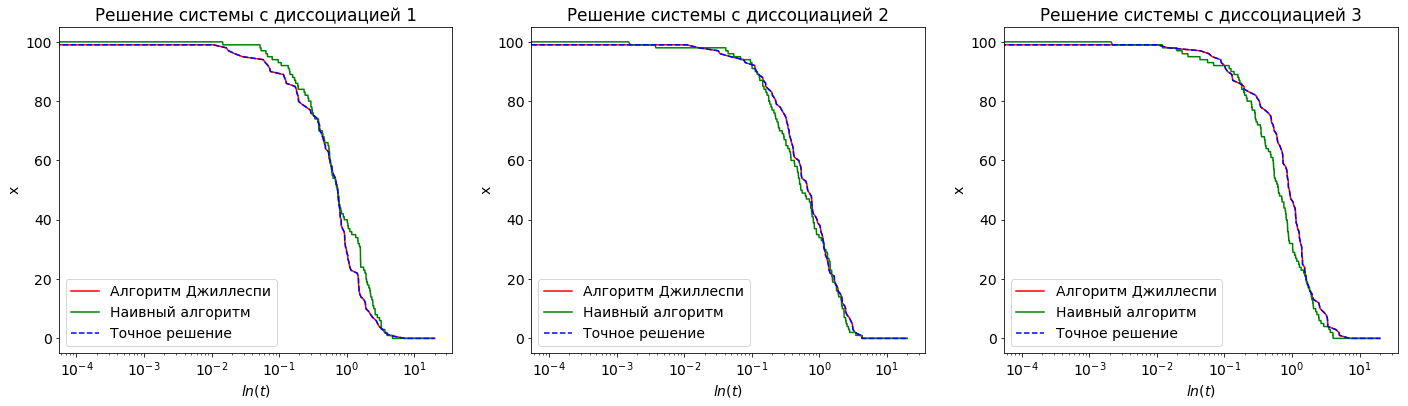

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(24,6), sharex=True)
reaction_coefficients_function = [lambda a, x: a[0] * x[0]]
reaction_functions = [lambda x: [x[0] - 1]]
nativeTime = 0
gillespieTime = 0
for i in range(0, 3):
    start_time = time.process_time()
    points = native_algorithm(a, x0, reaction_coefficients_function, reaction_functions, t_step, t_max)
    nativeTime += time.process_time() - start_time
    x_n, y_n = zip(*points)

    start_time = time.process_time()
    points = gillespie_algorithm(a, x0, reaction_coefficients_function, reaction_functions, t_max)
    gillespieTime += time.process_time() - start_time
    x_g, y_g = zip(*points)
    
    while t < t_max:
        points.append((t, stable_solution(t, x0)[0]))
        t += t_step
    x, y = zip(*points)
    
    ax[i].plot(x_g, [elem[0] for elem in y_g], 'r', label='–ê–ª–≥–æ—Ä–∏—Ç–º –î–∂–∏–ª–ª–µ—Å–ø–∏')
    ax[i].plot(x_n, [elem[0] for elem in y_n], 'g', label='–ù–∞–∏–≤–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º')
    ax[i].plot(x, y, 'b--', label='–¢–æ—á–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ')
    ax[i].legend()
    ax[i].set_title('–†–µ—à–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º—ã —Å –¥–∏—Å—Å–æ—Ü–∏–∞—Ü–∏–µ–π {}'.format(i + 1))
    ax[i].set_xlabel(r'$ln(t)$')
    ax[i].set_ylabel('x')
    ax[i].set_xscale('log')

average_g = gillespieTime / 3.0
average_n = nativeTime / 3.0
print("Average time of the native algorithm: {} ms".format(average_n*1000))
print("Average time of the gillespie algorithm: {} ms".format(average_g*1000))
pass

–í–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–≤–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –∏ –∞–ª–≥–æ—Ä–∏—Ç–º –î–∂–∏–ª–ª–µ—Å–ø–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ —Å—Ö–æ–¥—è—Ç—Å—è –∫ —Ç–æ—á–Ω–æ–º—É —Ä–µ—à–µ–Ω–∏—é. –ê–ª–≥–æ—Ä–∏—Ç–º –î–∂–∏–ª–ª–µ—Å–ø–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –±—ã—Å—Ç—Ä–µ–µ, —á–µ–º –Ω–∞–∏–≤–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º, –ø–æ—á—Ç–∏ –≤ 86 —Ä–∞–∑!

# –ó–∞–¥–∞—á–∞ ‚Ññ5

#### –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞:

–ü—Ä–æ—Ü–µ—Å—Å—ã —Å–∏–Ω—Ç–µ–∑–∞ –º–æ–ª–µ–∫—É–ª –≤–æ–¥–æ—Ä–æ–¥–∞ –∏–∑ –∞—Ç–æ–º–æ–≤ –≤–æ–¥–æ—Ä–æ–¥–∞ –∏ –ø—Ä–æ—Ü–µ—Å—Å —Ä–∞—Å–ø–∞–¥–∞ –º–æ–ª–µ–∫—É–ª –≤–æ–¥–æ—Ä–æ–¥–∞ –Ω–∞ –∞—Ç–æ–º–∞—Ä–Ω—ã–π –≤–æ–¥–æ—Ä–æ–¥ –æ–ø–∏—Å—ã–≤–∞–µ—Ç—Å—è —Å–∏—Å—Ç–µ–º–æ–π –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö —É—Ä–∞–≤–Ω–µ–Ω–∏–π 

$$ 
\begin{cases}
\dot x_1=2ùõæùë•_2‚àí2ùëéùë•_1^2 \\
\dot x_2=ùëéùë•_1^2‚àíùõæùë•_2
\end{cases}
$$

–ì–¥–µ $ùë•_1$ ‚Äì —á–∏—Å–ª–æ –∞—Ç–æ–º–æ–≤ –≤–æ–¥–æ—Ä–æ–¥–∞, $ùë•_2$ ‚Äì —á–∏—Å–ª–æ –º–æ–ª–µ–∫—É–ª –≤–æ–¥–æ—Ä–æ–¥–∞.

–ò–∑–º–µ–Ω–µ–Ω–∏–µ —á–∏—Å–ª–∞ –º–æ–ª–µ–∫—É–ª –∏ –∞—Ç–æ–º–æ–≤ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ —Å–∏–Ω—Ç–µ–∑–∞ —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º $ùëéùë•_1^2$ –º–æ–∂–Ω–æ –æ–ø–∏—Å–∞—Ç—å –∫–∞–∫

$$ 
\begin{cases}
ùë•_1‚Üí ùë•_1‚àí2 \\
ùë•_2‚Üíùë•_2+1
\end{cases}
$$

–ò–∑–º–µ–Ω–µ–Ω–∏–µ —á–∏—Å–ª–∞ –º–æ–ª–µ–∫—É–ª –∏ –∞—Ç–æ–º–æ–≤ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –¥–∏—Å—Å–æ—Ü–∏–∞—Ü–∏–∏ —Å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º $ùõæùë•_2$ –º–æ–∂–Ω–æ –æ–ø–∏—Å–∞—Ç—å –∫–∞–∫

$$ 
\begin{cases}
ùë•_1‚Üí ùë•_1 + 2 \\
ùë•_2‚Üíùë•_2-1
\end{cases}
$$

#### –ó–∞–¥–∞–Ω–∏–µ:

1. –†–µ—à–∏—Ç—å –Ω–∞–∏–≤–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –î–∂–∏–ª–ª–µ—Å–ø–∏ –∏ –º–µ—Ç–æ–¥–æ–º –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞.

#### –†–µ—à–µ–Ω–∏–µ:


In [128]:
def dissociation_process(t, x):
    a = g = 1.0
    dx1 = 2*g*x[1] - 2*a*(x[0]*x[0])
    dx2 = a*(x[0]*x[0]) - g*x[1]
    return bp.array(dx1, dx2)

In [129]:
t_max = 0.25
delta_t = 1e-4
x0 = [100.0, 0.0]
a = [1.0, -1.0]

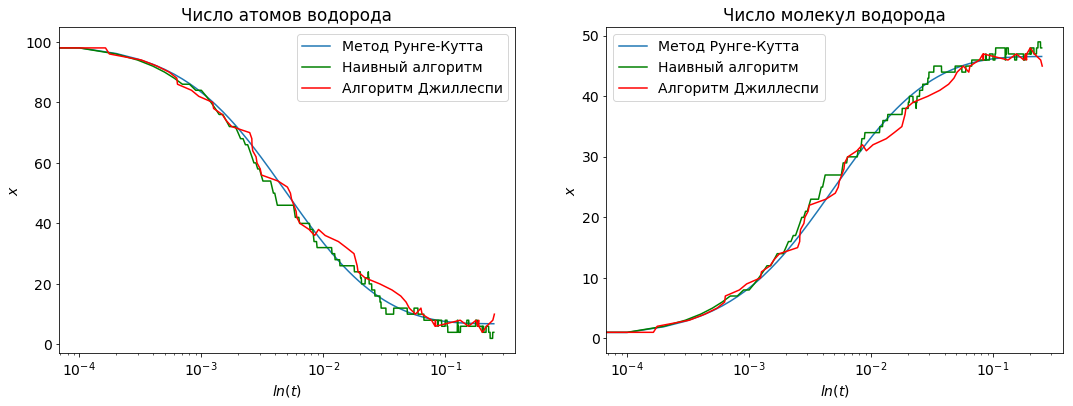

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6), sharex=True)

coefficients_function = [lambda a, x: a[0] * x[0] * x[0], lambda a, x: -a[1] * x[1]]
functions = [lambda x: [x[0] - 2, x[1] + 1], lambda x: [x[0] + 2, x[1] - 1]]

points = runge(dissociation_process, x0, delta_t, int(t_max/delta_t))
x_rk, y_rk = zip(*points)
points = native_algorithm(a, x0, coefficients_function, functions, delta_t, t_max)
x_n, y_n = zip(*points)
points = gillespie_algorithm(a, x0, coefficients_function, functions, t_max)
x_g, y_g = zip(*points)

plt.xscale('log')

for (i, ax, title) in ((0, ax1, "–ß–∏—Å–ª–æ –∞—Ç–æ–º–æ–≤ –≤–æ–¥–æ—Ä–æ–¥–∞"), (1, ax2, "–ß–∏—Å–ª–æ –º–æ–ª–µ–∫—É–ª –≤–æ–¥–æ—Ä–æ–¥–∞")):    
    ax.plot(x_rk, [elem[i] for elem in y_rk], label='–ú–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç–∞')
    ax.plot(x_n, [elem[i] for elem in y_n], 'g', label='–ù–∞–∏–≤–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º')
    ax.plot(x_g, [elem[i] for elem in y_g], 'r', label='–ê–ª–≥–æ—Ä–∏—Ç–º –î–∂–∏–ª–ª–µ—Å–ø–∏')
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('$ln(t)$')
    ax.set_ylabel('$x$')
    ax.set_xscale('log')
pass

–í–∏–¥–Ω–æ, —á—Ç–æ –≤—Å–µ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–∏–±–ª–∏–∂–µ–Ω—ã –∫ –æ–¥–Ω–æ–π –∫—Ä–∏–≤–æ–π, –Ω–µ—Ç –±–æ–ª—å—à–∏—Ö —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–π.